In [1]:
pip install pandas

In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


# *DATAFRAME*

In [6]:
import pandas as pd
df = pd.read_csv(r'netflix_titles.csv')

> *Top 5 rows of Dataframe*

In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


> *DATATYPE*

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


> *Columns having null values*

In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
# Extract genre and cast
genres = df['listed_in'].str.split(',').explode().str.strip()
casts = df['cast'].str.split(',').explode().str.strip()

# *Exploratory Data Analysis* 

In [11]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## *Content-Type Distribution - MOVIE VS. TV SHOWS*

In [13]:
content_type_dist = df['type'].value_counts()

In [41]:
# Content Type Distribution
print("Total Movie count:", content_type_dist['Movie'].sum())
print("Total TV Show count:", content_type_dist['TV Show'].sum())

Total Movie count: 6131.0
Total TV Show count: 2676.0


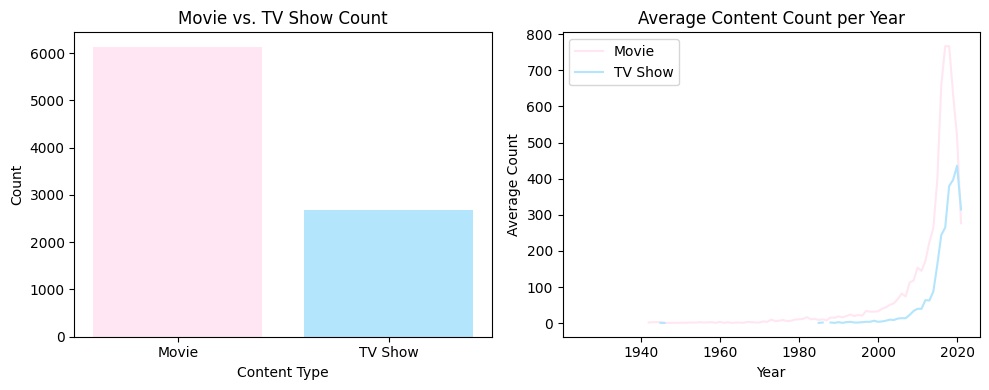

In [50]:
import matplotlib.pyplot as plt

# Pastel colors
colors = ['#ffe6f2', '#b3e5fc']

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Bar chart for total count
ax[0].bar(['Movie', 'TV Show'], [content_type_dist['Movie'].sum(), content_type_dist['TV Show'].sum()], color=colors)    
ax[0].set_title('Movie vs. TV Show Count')
ax[0].set_xlabel('Content Type')
ax[0].set_ylabel('Count')

# Line chart for average count per year
for content_type, color in zip(['Movie', 'TV Show'], colors):
    ax[1].plot(content_type_dist.index, content_type_dist[content_type], label=content_type, color=color)
ax[1].set_title('Average Content Count per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Average Count')
ax[1].legend()

plt.tight_layout()
plt.show()

## *Trend of Content over years*

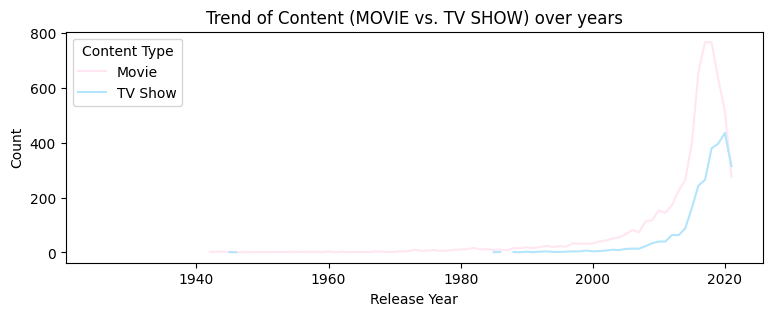

In [37]:
# Group by release year and type, and get the count of content types
content_type_dist = df.groupby(['release_year', 'type']).size().unstack()
import matplotlib.pyplot as plt
# Pastel colors
colors = ['#ffe6f2', '#b3e5fc']
content_type_dist.plot(kind='line', figsize=(9, 3), color=colors)
plt.title('Trend of Content (MOVIE vs. TV SHOW) over years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Content Type')

## *TOP GENRES*

listed_in
 International Movies     2624
Dramas                    1600
Comedies                  1210
Action & Adventure         859
Documentaries              829
 Dramas                    827
International TV Shows     774
 Independent Movies        736
 TV Dramas                 696
 Romantic Movies           613
Name: count, dtype: int64


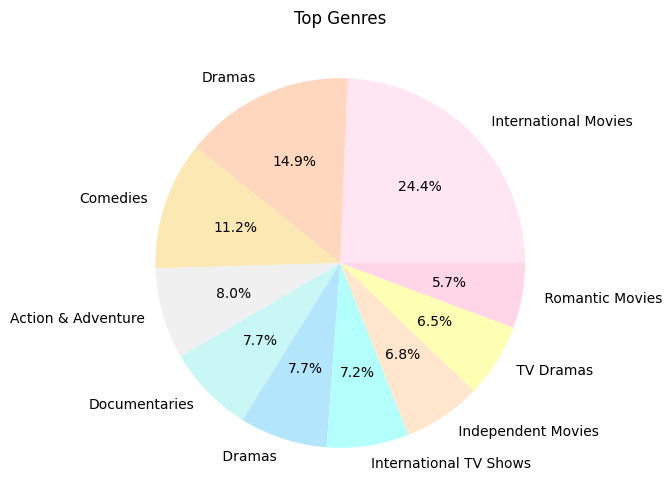

In [18]:
#Top Genres:

top_genres = df['listed_in'].str.split(',').explode().value_counts().head(10)
print(top_genres)
# Pastel colors
colors = ['#ffe6f2', '#ffd7be', '#fce8b3', '#f0f0f0', '#c9f7f5', '#b3e5fc', '#b2fffc', '#ffe6cc', '#ffffb3', '#ffd6e7']

# Pie chart
plt.figure(figsize=(10,6))
plt.pie(top_genres.values, labels=top_genres.index, colors=colors, autopct='%1.1f%%')
plt.title('Top Genres')
plt.show()

## *TOP DIRECTORS*

In [19]:
#Top Directors:

top_directors = df['director'].value_counts().head(10)
print(top_directors)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64


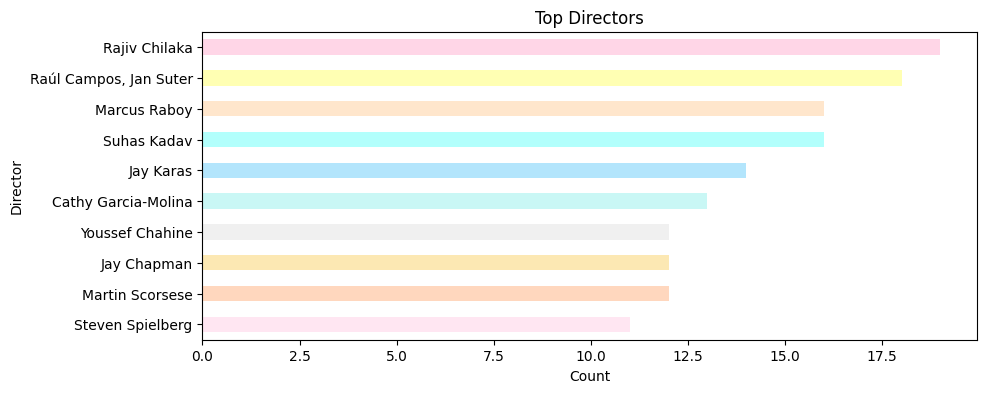

In [20]:
# Pastel colors
colors = ['#ffe6f2', '#ffd7be', '#fce8b3', '#f0f0f0', '#c9f7f5', '#b3e5fc', '#b2fffc', '#ffe6cc', '#ffffb3', '#ffd6e7']

top_directors = top_directors.sort_values(ascending=True)
top_directors.plot(kind='barh', figsize=(10, 4), color=colors)
plt.title('Top Directors')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()

## *TOP ACTORS*

In [21]:
#Top Actors:

top_actors = df['cast'].str.split(',').explode().value_counts().head(10)
print(top_actors)

cast
 Anupam Kher         39
 Rupa Bhimani        31
 Takahiro Sakurai    30
 Julie Tejwani       28
 Om Puri             27
Shah Rukh Khan       26
 Rajesh Kava         26
 Boman Irani         25
 Paresh Rawal        25
 Andrea Libman       25
Name: count, dtype: int64


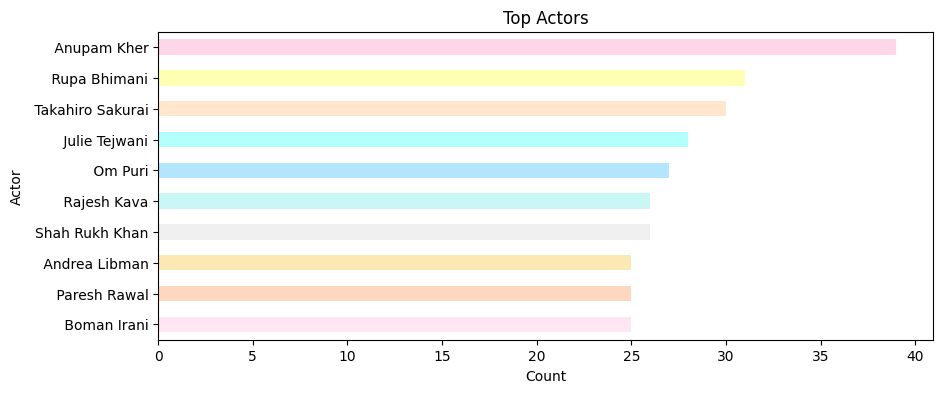

In [22]:
# Pastel colors
colors = ['#ffe6f2', '#ffd7be', '#fce8b3', '#f0f0f0', '#c9f7f5', '#b3e5fc', '#b2fffc', '#ffe6cc', '#ffffb3', '#ffd6e7']

top_actors = top_actors.sort_values(ascending=True)
top_actors.plot(kind='barh', figsize=(10, 4), color=colors)
plt.title('Top Actors')
plt.xlabel('Count')
plt.ylabel('Actor')
plt.show()

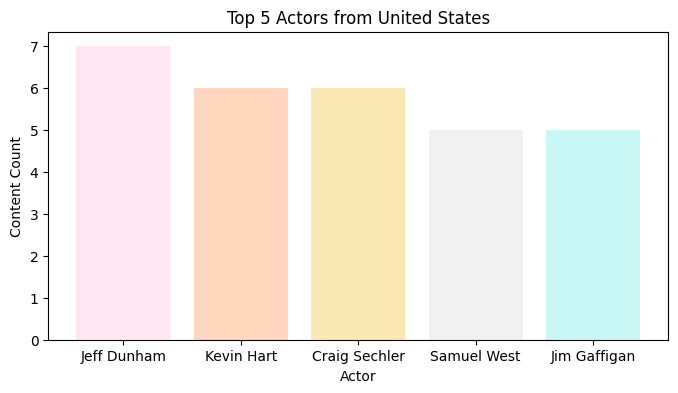

In [23]:
us_actors = df[df['country'] == 'United States']
us_actor_counts = us_actors['cast'].value_counts().head(5)  # Get the top 5 actors
top_us_actors = us_actor_counts.index.tolist()  # Get the names of the top 5 actors
content_counts = us_actor_counts.values.tolist()  # Get the content counts for the top 5 actors

# Create a bar graph
plt.figure(figsize=(8, 4))  # Set figure size to 8x6 inches
plt.bar(top_us_actors, content_counts, color=['#ffe6f2', '#ffd7be', '#fce8b3', '#f0f0f0', '#c9f7f5'])
plt.xlabel('Actor')
plt.ylabel('Content Count')
plt.title('Top 5 Actors from United States')
plt.show()

## *TOP 10 PRODUCTION COMPANY*

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


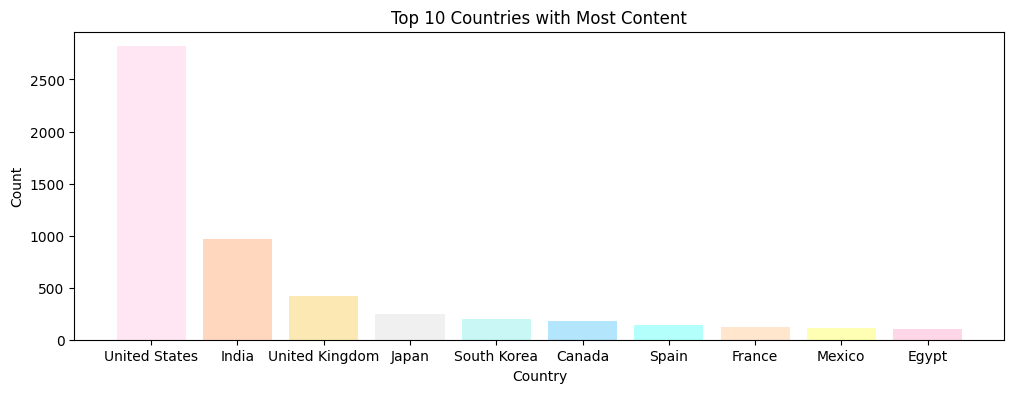

In [24]:
#TOP 10 Production Country:

country_dist = df['country'].value_counts().head(10)
print(country_dist)

import matplotlib.pyplot as plt

# Pastel colors
colors = ['#ffe6f2', '#ffd7be', '#fce8b3', '#f0f0f0', '#c9f7f5', '#b3e5fc', '#b2fffc', '#ffe6cc', '#ffffb3', '#ffd6e7'] 

# Bar chart: Top 10 countries with most content
plt.figure(figsize=(12,4))  # Set figure size to 10x6 inches
countries = df['country'].value_counts().head(10)
plt.bar(countries.index, countries.values, color=colors)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries with Most Content')
plt.show()

## *Rating Distribution*

In [25]:
#RATING DISTRIBUTION
# Replace the three values with TV-14
df['rating'] = df['rating'].replace(['74 min', '84 min', '66 min'], 'TV-14')
rating_counts = df['rating'].value_counts()
print(rating_counts)

rating
TV-MA       3207
TV-14       2163
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64


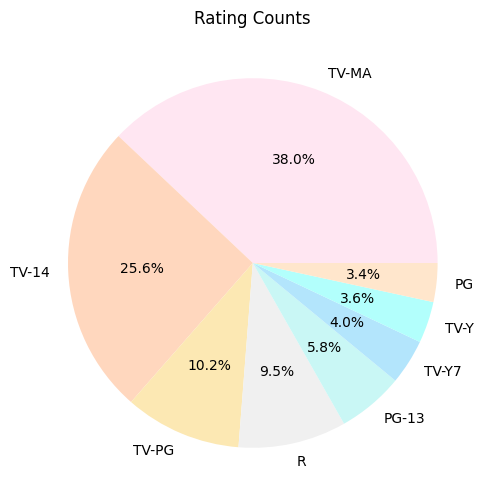

In [53]:
import matplotlib.pyplot as plt

# Rating counts
rating_counts = df['rating'].value_counts().head(8)

# Pastel colors
colors = ['#ffe6f2', '#ffd7be', '#fce8b3', '#f0f0f0', '#c9f7f5', '#b3e5fc', '#b2fffc', '#ffe6cc', '#ffffb3', '#ffd6e7']

# Pie chart
plt.figure(figsize=(10, 6))
plt.pie(rating_counts.values, labels=rating_counts.index, colors=colors, autopct='%1.1f%%')
plt.title('Rating Counts')
plt.show()

## *Top 10 Movies that are listed in **Documentaries***

In [29]:
import pandas as pd

# Assuming the data is in a DataFrame called 'df'

# Filter the data to only include movies (not TV shows) and documentaries
documentaries = df[(df['type'] == 'Movie') & (df['listed_in'].str.contains('Documentaries'))]

# Sort the documentaries by release year in descending order and get the top 10
top_10_documentaries = documentaries.sort_values(by='release_year', ascending=False).head(10)

# Print the top 10 documentaries
print(top_10_documentaries['title'])

560                                        Audible
45                          My Heroes Were Cowboys
467    Private Network: Who Killed Manuel Buendía?
770                      Myriam Fares: The Journey
781          Black Holes | The Edge of All We Know
318            Shiny_Flakes: The Teenage Drug Lord
317                                      Pray Away
404                  9to5: The Story of a Movement
455           Emicida: AmarElo - Live in São Paulo
457                               Lift Like a Girl
Name: title, dtype: object
